In [1]:
import ctypes

In [18]:
libc = ctypes.CDLL("./kepler.so")

In [56]:
n, t0, e, a = 10, 0, 0.1, 1
t = np.linspace(0, 10, 1000)
n = ctypes.c_double(n)
t0 = ctypes.c_double(t0)
e = ctypes.c_double(e)
a = ctypes.c_double(a)
m = ctypes.c_int(len(t))
r, f = np.zeros(len(t)), np.zeros(len(t))

In [40]:
#t = np.linspace(0, 10, 60)
#arraytype = (ctypes.c_double * len(t)) * 2
#libc.solve_kepler_array.restype = ctypes.POINTER(arraytype)
#t = (ctypes.c_double * len(t))(*t)

In [41]:
#%time res = libc.solve_kepler_array(t, n, t0, e, a)
#res = np.array(res.contents)

In [57]:
from numpy.ctypeslib import ndpointer
#libc.solve_kepler_array.restype = ndpointer(dtype=ctypes.c_double, ndim=2, shape=(2, len(t)))
libc.solve_kepler_array.restype = ctypes.POINTER(ctypes.c_double * 2) * len(t)
t = (ctypes.c_double * len(t))(*t)
r = (ctypes.c_double * len(r))(*r)
f = (ctypes.c_double *len(f))(*f)

In [58]:
%time libc.solve_kepler_array(r, f, t, n, t0, e, a, m)

CPU times: user 438 µs, sys: 91 µs, total: 529 µs
Wall time: 304 µs


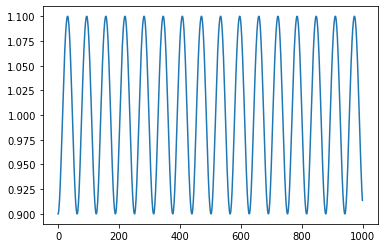

In [60]:
import matplotlib.pyplot as pl
pl.plot(r)

In [48]:
i, w = 90 / 2 / np.pi, 10 / 2 / np.pi
r, f = np.array(r), np.array(f)
x = -r * np.cos(w + f)
y = -r * np.sin(w + f)*np.cos(i)
z = r * np.sin(w + f)*np.sin(i)

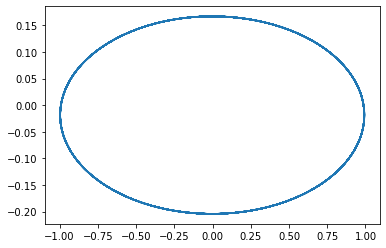

In [49]:
pl.plot(x, y)

In [ ]:
np.array(res.contents)

In [63]:
import copy

In [64]:
copy.deepcopy

<function copy.deepcopy(x, memo=None, _nil=[])>